In [1]:
# Import Pandas, Numpy
import pandas as pd
import numpy as np

# Import matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt

# Plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file
df = pd.read_csv('data/MCD.csv', index_col=0, parse_dates=True, dayfirst=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,262.540009,265.459991,262.410004,264.230011,258.447784,2384000
2022-08-02,264.619995,265.450012,260.890015,261.049988,255.337357,2375200
2022-08-03,261.049988,262.920013,259.760010,262.089996,256.354584,2305300
2022-08-04,261.700012,262.179993,258.690002,260.640015,254.936340,2089600
2022-08-05,259.640015,260.029999,257.070007,259.230011,253.557190,1818500
...,...,...,...,...,...,...
2023-07-24,296.000000,296.950012,294.859985,295.309998,295.309998,2034400
2023-07-25,294.200012,294.929993,291.649994,292.359985,292.359985,2780600
2023-07-26,292.250000,292.579987,289.500000,291.750000,291.750000,2896900


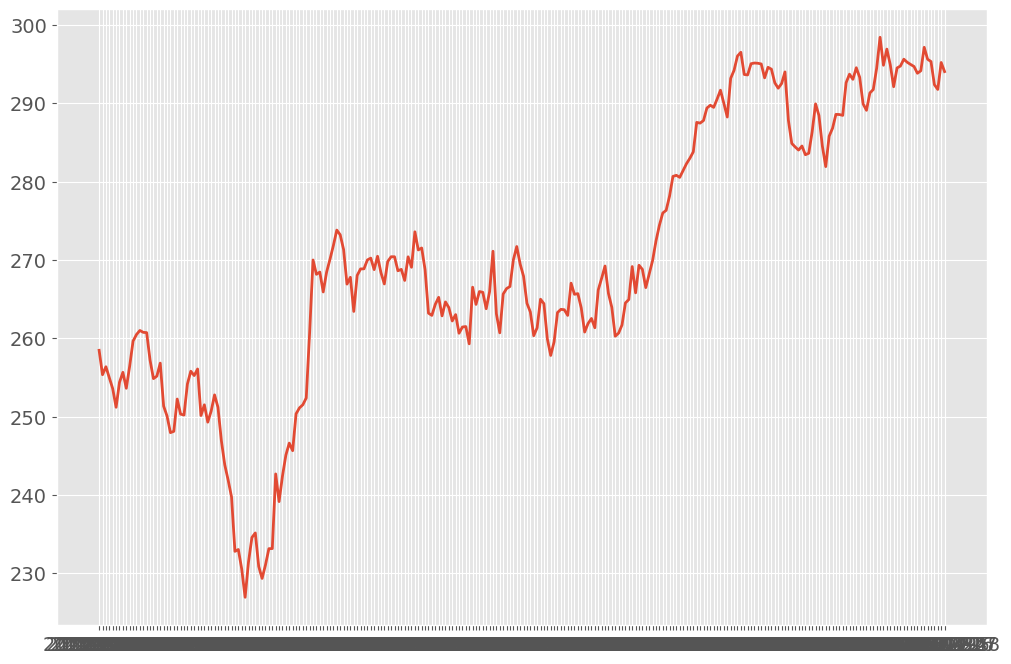

In [3]:
# Visualize the plot to verify the data
plt.plot(df.index, df['Adj Close'])

In [4]:
# Verify the datetime format
df.index

Index(['2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
       '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
       ...
       '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21',
       '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27', '2023-07-28'],
      dtype='object', name='Date', length=250)

In [5]:
# Caclulate returns and add it to existing DataFrame as a column
df['Return'] = df['Adj Close'].pct_change().fillna(0)

# Get first 5 rows
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2022-08-01,262.540009,265.459991,262.410004,264.230011,258.447784,2384000,0.000000
2022-08-02,264.619995,265.450012,260.890015,261.049988,255.337357,2375200,-0.012035
2022-08-03,261.049988,262.920013,259.760010,262.089996,256.354584,2305300,0.003984
2022-08-04,261.700012,262.179993,258.690002,260.640015,254.936340,2089600,-0.005532
2022-08-05,259.640015,260.029999,257.070007,259.230011,253.557190,1818500,-0.005410


In [6]:
# Calculate mean and sigma
mu = np.mean(df['Return'])
sigma = np.std(df['Return'])

mu, sigma

(0.0005649182275607214, 0.00989541313618486)

In [8]:
# Define Z-score function
def zscore(returns):
    zs = (returns - np.mean(returns))/np.std(returns)
    return zs

In [9]:
# Calculate the scaled return: zscore
df['Scaled_Return'] = df['Return'].apply(lambda x: (x-mu)/sigma)

# Check the output
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Scaled_Return
Date,,,,,,,,
2022-08-01,262.540009,265.459991,262.410004,264.230011,258.447784,2384000,0.000000,-0.057089
2022-08-02,264.619995,265.450012,260.890015,261.049988,255.337357,2375200,-0.012035,-1.273312
2022-08-03,261.049988,262.920013,259.760010,262.089996,256.354584,2305300,0.003984,0.345507
2022-08-04,261.700012,262.179993,258.690002,260.640015,254.936340,2089600,-0.005532,-0.616171
2022-08-05,259.640015,260.029999,257.070007,259.230011,253.557190,1818500,-0.005410,-0.603785


In [10]:
# Calculate minimum and maximum bin range
sr_min = np.min(df['Scaled_Return'])
sr_max = np.max(df['Scaled_Return'])

sr_min, sr_max

(-3.0322736304122637, 4.073693318852295)

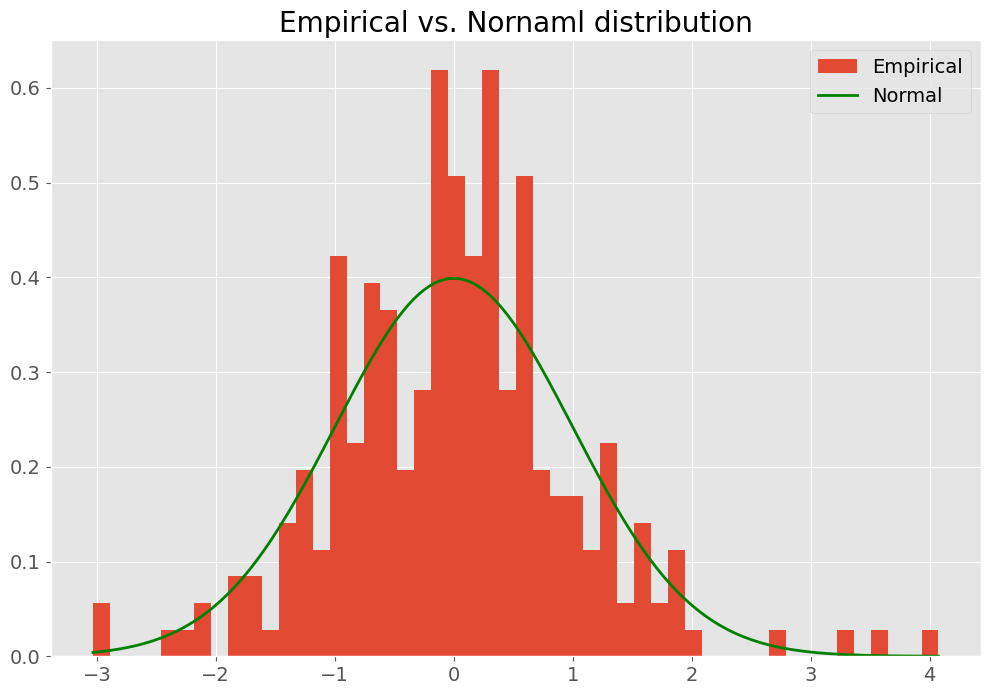

In [12]:
# Define bins - x
x = np.linspace(sr_min, sr_max, 200)

# Calculate Normal probability density function - y
y = (1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2))

# Plot histogram of scaled returns
plt.hist(df['Scaled_Return'], bins=50, density=True, label='Empirical', alpha=1)

# Plot Normal pdf
plt.plot(x, y, color='green', label='Normal', alpha=1)

# Set title
plt.title('Empirical vs. Nornaml distribution')

# Set legends
plt.legend()
plt.show()